<a href="https://colab.research.google.com/github/sraeisi/MachineLearning_Physics/blob/master/Lec_6/Optimizing_the_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['lines.markersize'] = 2

## Sample data with a local minimum

In [0]:
## Let's first set how many sample our data has.
n_s=10000

## Now we generate some data with two features (ns, 2)
X = np.random.uniform(-1,1, [n_s, 2])

W = np.random.uniform(-1,1, 2)
Y = np.dot(X,W)

In [0]:
## Now we make the loss manifold. 

##We use the L2 loss for this section.
def l2_loss(y,a):
    return np.sum( (y-a)**2 )/2/len(y)

## Next we generate n_points random guess for the weights
## that we plan to calculate the loss for to get a sense of 
## sense of the loss manifold. 

n_points = 1000
w_list = np.random.uniform(-1,1, [2, n_points])

Y_predicted = np.dot( X ,  w_list )

loss_list = np.array([l2_loss(y, Y) for y in Y_predicted.T ])

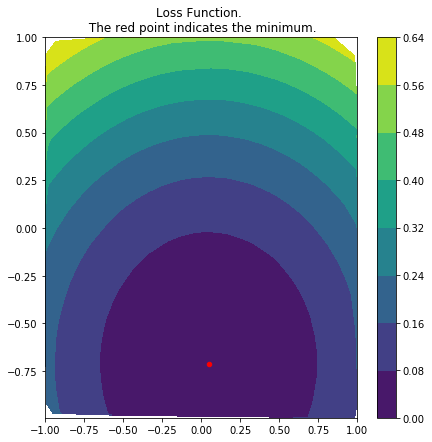

In [0]:
fig = plt.figure(figsize=(7,7))
ax1 = fig.add_subplot(1,1,1, title='Loss Function. \n The red point indicates the minimum.')

p1 = ax1.tricontourf(w_list[0], w_list[1] ,loss_list)
ax1.scatter(W[0], W[1], color='r', s=20)
plt.colorbar(p1, ax=ax1)

plt.show()

# Optimization

## Simple GD

In [0]:
def GD_optimizer(X, Y, eta=.03, n_itr = 1000):
    n_s = len(Y)
    w = np.random.uniform(-1,1,2)
    w_hist = [w]
   
    for i in range(n_itr):
        dw = np.dot( X.T , ( np.dot(X,w) - Y)   )/n_s
        w = w - eta*dw
        w_hist += [w]
        
    return w, np.array(w_hist)

In [0]:
w_gd, hist_gd = GD_optimizer(X,Y)

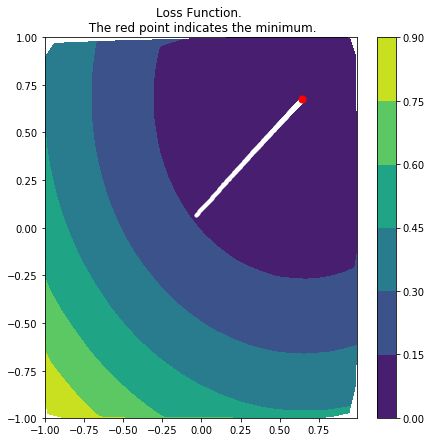

In [0]:
fig = plt.figure(figsize=(7,7))
ax1 = fig.add_subplot(1,1,1, title='Loss Function. \n The red point indicates the minimum.')

p1 = ax1.tricontourf(w_list[0], w_list[1] ,loss_list)
ax1.scatter(hist_gd[:,0],hist_gd[:,1], color='white', s=10)
ax1.scatter(W[0], W[1], color='r', s=50)
plt.colorbar(p1, ax=ax1)

plt.show()

## SGD with mini_batches

In [0]:
def SGD_MB_optimizer(X, Y, eta=.5, batch_size=100, n_epoch = 10):
    n_s = len(Y)
    w = np.random.uniform(-1,1,2)
    w_hist = [w]


    from sklearn.utils import shuffle
    X, Y = shuffle(X, Y, random_state=0)   
   
    for i in range(n_epoch):
        for batch_ind in range(0, int(n_s/batch_size) ):
            x_batch = X[batch_ind*batch_size: min(n_s, (batch_ind+1)*batch_size ) ]
            y_batch = Y[batch_ind*batch_size: min(n_s, (batch_ind+1)*batch_size ) ]
        
            dw = np.dot( x_batch.T , ( np.dot(x_batch,w) - y_batch)   )/batch_size
            w = w - eta*dw
            w_hist += [w]
        
    return w, np.array(w_hist)

In [0]:
w_sgd, hist_sgd = SGD_MB_optimizer(X,Y,eta=.05, batch_size=10, n_epoch=100)

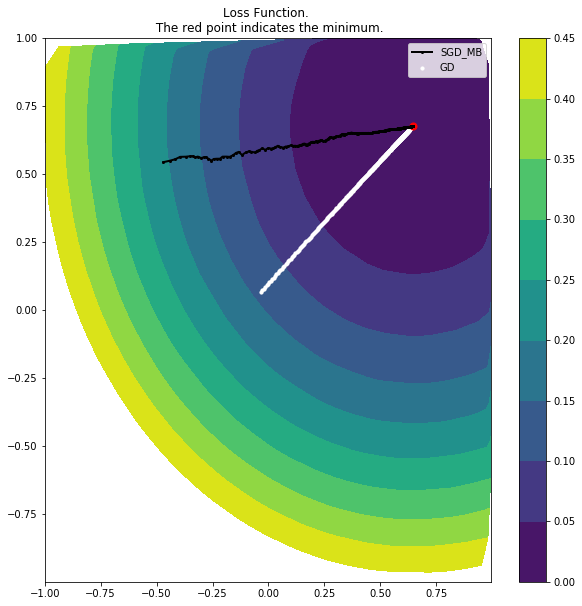

In [0]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(1,1,1, title='Loss Function. \n The red point indicates the minimum.')

p1 = ax1.tricontourf(w_list[0], w_list[1] ,loss_list, np.arange(0,.5,.05))
plt.colorbar(p1)
# ax1.set_ylim(-.75,.25)
ax1.scatter(hist_gd[:,0],hist_gd[:,1], color='white', s=10, label = 'GD')
ax1.plot(hist_sgd[:,0],hist_sgd[:,1],linestyle='-', marker='o', color='black', label = 'SGD_MB', lw = 2)
ax1.scatter(W[0], W[1], color='r', s=50)
plt.legend(loc=0)

plt.show()

## Weighted Average

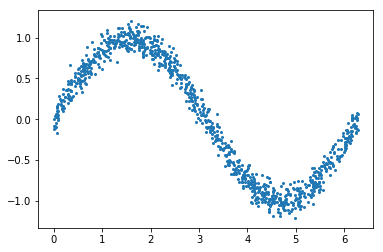

In [0]:
n_points = 1000
X_s = np.sort(np.random.uniform(0,2*np.pi, n_points ))
Y_s = np.sin( X_s ) + np.random.normal(0, .1, n_points)
plt.scatter(X_s, Y_s)

How can I find a fit based on the average?

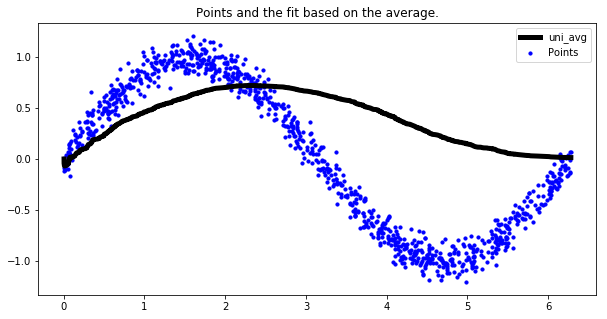

In [0]:
uni_avg = [ np.sum( Y_s[:i] )/(i+1) for i in range(len(Y_s)  ) ]

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,1,1, title='Points and the fit based on the average.')

# p1 = ax1.tricontourf(w_list[0], w_list[1] ,loss_list, np.arange(0,.5,.05))
# plt.colorbar(p1)
# ax1.set_ylim(-.75,.25)
ax1.scatter(X_s, Y_s, color='b', s=10, label = 'Points')
ax1.plot(X_s, uni_avg,linestyle='-', marker='o', color='black', label = 'uni_avg', lw = 5)

plt.legend(loc=0)

plt.show()

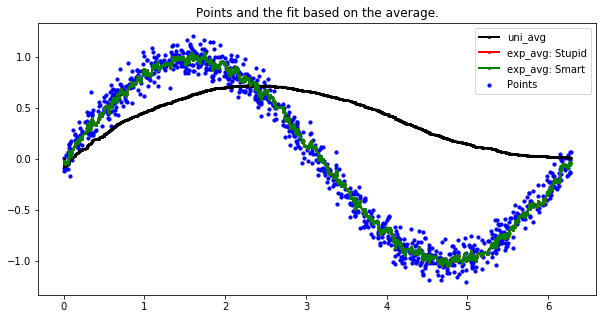

In [0]:
## We first set the memory coef
beta = .8
## We then make the weights: This is the stupid way
exp_weights = np.array([(beta**t * (1-beta)) for t in range(len(Y_s) )])[::-1]

## And now we multiply the weights and sum them up. 
exp_avg =  [ np.sum( exp_weights[-(i):] * Y_s[:i] ) for i in range(1,len(Y_s)+1  ) ]


### Alternatively, we can do
exp_avg2 = []
last_exp_avg=0
for i in range(len(Y_s) ):
    last_exp_avg = beta*last_exp_avg + (1-beta)*Y_s[i] 
    exp_avg2 += [last_exp_avg]


fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,1,1, title='Points and the fit based on the average.')

# p1 = ax1.tricontourf(w_list[0], w_list[1] ,loss_list, np.arange(0,.5,.05))
# plt.colorbar(p1)
# ax1.set_ylim(-.75,.25)
ax1.scatter(X_s, Y_s, color='b', s=10, label = 'Points')
ax1.plot(X_s, uni_avg,linestyle='-', marker='o', color='black', label = 'uni_avg', lw = 2)
ax1.plot(X_s, exp_avg,linestyle='-', marker='o', color='r', label = 'exp_avg: Stupid', lw = 2)
ax1.plot(X_s, exp_avg2,linestyle='-', marker='o', color='green', label = 'exp_avg: Smart', lw = 2)

plt.legend(loc=0)

plt.show()

## Gradient Descent with Momentum 

In [0]:
def SGD_Momentum_optimizer(X, Y, eta=.5, batch_size=100, n_epoch = 10, beta=.9):
    n_s = len(Y)
    w = np.random.uniform(-1,1,2)
    w_hist = [w]
    
    dw = np.zeros(2)
    dw_avg = np.zeros(2)


    from sklearn.utils import shuffle
     
    itr = 0
    for i in range(n_epoch):
        X, Y = shuffle(X, Y, random_state=0)  
        for batch_ind in range(0, int(n_s/batch_size) ):
            itr +=1
            x_batch = X[batch_ind*batch_size: min(n_s, (batch_ind+1)*batch_size ) ]
            y_batch = Y[batch_ind*batch_size: min(n_s, (batch_ind+1)*batch_size ) ]
            
            
            ### This is what you need to fill in.
            dw = np.dot( x_batch.T , ( np.dot(x_batch,w) - y_batch)   ) / batch_size
            dw_avg = ( beta * dw_avg + (1-beta) * dw )#/(1-beta**itr) 
            w = w - eta*dw_avg
            w_hist += [w]
        
    return w, np.array(w_hist)

### Test

In [0]:
w_gdM, hist_gdM = SGD_Momentum_optimizer(X,Y,eta=.03, batch_size=100, n_epoch=100)

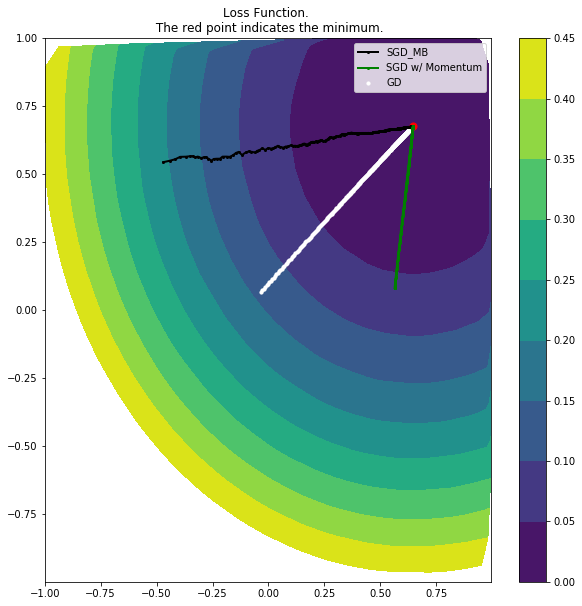

In [0]:

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(1,1,1, title='Loss Function. \n The red point indicates the minimum.')

p1 = ax1.tricontourf(w_list[0], w_list[1] ,loss_list, np.arange(0,.5,.05))
plt.colorbar(p1)
# ax1.set_ylim(-.75,.25)
ax1.scatter(hist_gd[:,0],hist_gd[:,1], color='white', s=10, label = 'GD')
ax1.plot(hist_sgd[:,0],hist_sgd[:,1],linestyle='-', marker='o', color='black', label = 'SGD_MB', lw = 2)
ax1.plot(hist_gdM[:,0],hist_gdM[:,1],linestyle='-', marker='o', color='green', label = 'SGD w/ Momentum', lw = 2)
ax1.scatter(W[0], W[1], color='r', s=50)
plt.legend(loc=0)

plt.show()

## RMS prop

In [0]:
def SGD_RMS_optimizer(X, Y, eta=.5, batch_size=100, n_epoch = 10, gamma=.9, eps=.000001):
    n_s = len(Y)
    w = np.random.uniform(-1,1,2)
    w_hist = [w]
    
    dw = np.zeros(2)
    dw_avg2 = np.zeros(2)


    from sklearn.utils import shuffle
     
    itr = 0
    for i in range(n_epoch):
        X, Y = shuffle(X, Y, random_state=0)  
        for batch_ind in range(0, int(n_s/batch_size) ):
            itr +=1
            x_batch = X[batch_ind*batch_size: min(n_s, (batch_ind+1)*batch_size ) ]
            y_batch = Y[batch_ind*batch_size: min(n_s, (batch_ind+1)*batch_size ) ]
            
            
            ### This is what you need to fill in.
            dw = np.dot( x_batch.T , ( np.dot(x_batch,w) - y_batch)   ) / batch_size
            dw_avg2 = ( beta * dw_avg2 + (1-beta) * dw**2 )#/(1-beta**itr) 
            w = w - eta*dw/np.sqrt(dw_avg2+eps)
            w_hist += [w]
        
    return w, np.array(w_hist)

### Test

In [0]:
w_rms, hist_rms = SGD_RMS_optimizer(X,Y,eta=.03, batch_size=100, n_epoch=100)

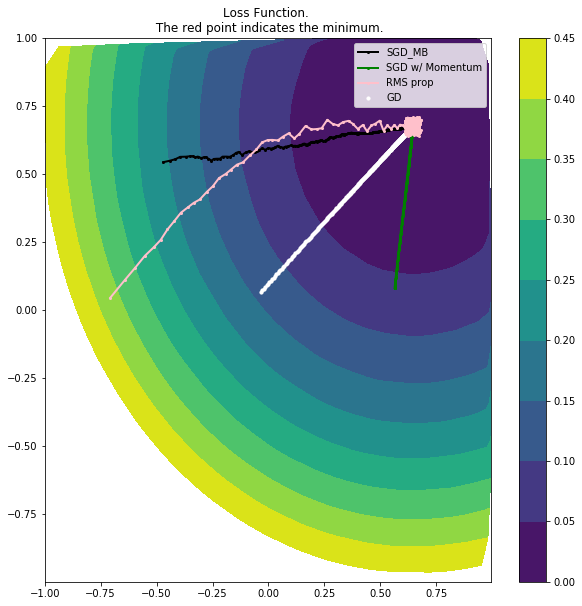

In [0]:

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(1,1,1, title='Loss Function. \n The red point indicates the minimum.')

p1 = ax1.tricontourf(w_list[0], w_list[1] ,loss_list, np.arange(0,.5,.05))
plt.colorbar(p1)
# ax1.set_ylim(-.75,.25)
ax1.scatter(hist_gd[:,0],hist_gd[:,1], color='white', s=10, label = 'GD')
ax1.plot(hist_sgd[:,0],hist_sgd[:,1],linestyle='-', marker='o', color='black', label = 'SGD_MB', lw = 2)
ax1.plot(hist_gdM[:,0],hist_gdM[:,1],linestyle='-', marker='o', color='green', label = 'SGD w/ Momentum', lw = 2)
ax1.plot(hist_rms[:,0],hist_rms[:,1],linestyle='-', marker='o', color='pink', label = 'RMS prop', lw = 2)
ax1.scatter(W[0], W[1], color='r', s=50)
plt.legend(loc=0)

plt.show()

## Adam